In [1]:
import numpy as np
import pandas as pd 
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load data
file_path = Path("train.csv")
df = pd.read_csv(file_path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#View swamplot splitting data into 2 sets
df_plot_1 = df[df.columns[0:10]].copy()
df_plot_2 = df[df.columns[10:21]].copy()

In [5]:
y = df_plot_2.iloc[:,-1:]
df_plot_2.drop('price_range',axis=1,inplace=True)
df_plot_1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores
0,842,0,2.2,0,1,0,7,0.6,188,2
1,1021,1,0.5,1,0,1,53,0.7,136,3
2,563,1,0.5,1,2,1,41,0.9,145,5
3,615,1,2.5,0,0,0,10,0.8,131,6
4,1821,1,1.2,0,13,1,44,0.6,141,2


In [6]:
df_plot_2.head()

,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,2,20,756,2549,9,7,19,0,0,1
1,6,905,1988,2631,17,3,7,1,1,0
2,6,1263,1716,2603,11,2,9,1,1,0
3,9,1216,1786,2769,16,8,11,1,0,0
4,14,1208,1212,1411,8,2,15,1,1,0


In [7]:
df_plot_2.shape

(2000, 10)

In [8]:
df_plot_1.shape

(2000, 10)

In [9]:
#standardize the data sets
data_std_1 = (df_plot_1 - df_plot_1.mean()) / (df_plot_1.std())              
data_std_2 = (df_plot_2 - df_plot_2.mean()) / (df_plot_2.std())            

data_std_1['price_range'] = y
data_std_2['price_range'] = y

In [10]:
data_std_1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,price_range
0,-0.902372,-0.989802,0.830572,-1.018929,-0.762304,-1.043705,-1.380298,0.340654,1.348911,-1.101696,1
1,-0.495015,1.009798,-1.252751,0.980932,-0.992642,0.957646,1.154735,0.687376,-0.120029,-0.664602,2
2,-1.537302,1.009798,-1.252751,0.980932,-0.531966,0.957646,0.493422,1.380820,0.134210,0.209587,2
3,-1.418964,1.009798,1.198217,-1.018929,-0.992642,-1.043705,-1.214970,1.034098,-0.261274,0.646681,2
4,1.325574,1.009798,-0.394912,-1.018929,2.001753,0.957646,0.658751,0.340654,0.021215,-1.101696,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011607,1.009798,-1.252751,0.980932,-0.992642,0.957646,-1.655845,1.034098,-0.967495,0.646681,0
1996,1.653280,1.009798,1.320765,0.980932,-0.992642,-1.043705,0.383203,-1.046233,1.320663,-0.227507,2
1997,1.530391,-0.989802,-0.762557,0.980932,-0.762304,0.957646,0.217875,0.687376,-0.910998,1.520869,3
1998,0.622372,-0.989802,-0.762557,-1.018929,-0.071290,0.957646,0.768969,-1.392955,0.134210,0.209587,0


In [11]:
data_std_2

,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-1.305424,-1.408596,-1.146497,0.391605,-0.784787,0.283032,1.462128,-1.786414,-1.005767,0.985850,1
1,-0.645827,0.585631,1.704039,0.467200,1.113987,-0.635158,-0.734084,0.559501,0.993769,-1.013846,2
2,-0.645827,1.392336,1.074699,0.441387,-0.310094,-0.864705,-0.368048,0.559501,0.993769,-1.013846,2
3,-0.151130,1.286428,1.236662,0.594421,0.876640,0.512579,-0.002013,0.559501,-1.005767,-1.013846,2
4,0.673365,1.268401,-0.091429,-0.657502,-1.022134,-0.864705,0.730057,0.559501,0.993769,-1.013846,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.673365,1.299948,1.477291,-1.342463,0.164600,-0.405610,1.462128,0.559501,0.993769,-1.013846,0
1996,-1.140525,0.608165,1.650822,-0.085010,-0.310094,0.971674,0.913075,0.559501,0.993769,0.985850,2
1997,-1.140525,0.502257,0.880345,0.859924,-0.784787,-1.094253,-1.100119,0.559501,0.993769,-1.013846,3
1998,-0.810726,-0.696533,-1.345480,-1.157164,1.351334,0.971674,1.462128,0.559501,0.993769,0.985850,0


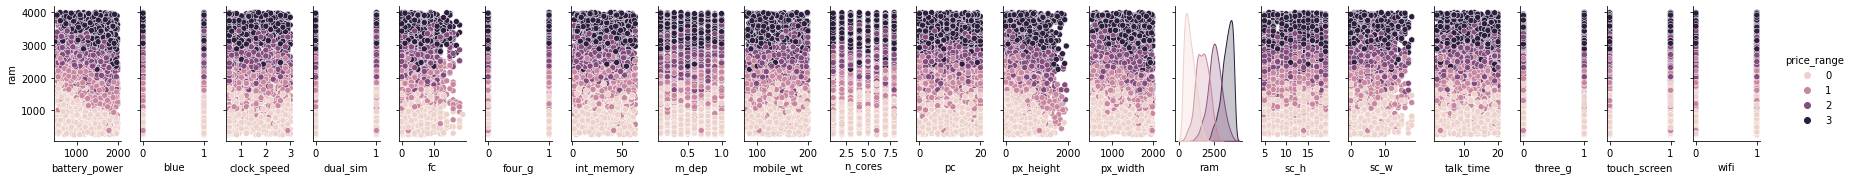

In [12]:
#Features with clear separation of target classes
g = sns.pairplot(data=df, hue= 'price_range', height=2.5,aspect=.5, y_vars = ['ram'],x_vars=['battery_power', 
        'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'battery_power'),
  Text(1, 0, 'blue'),
  Text(2, 0, 'clock_speed'),
  Text(3, 0, 'dual_sim'),
  Text(4, 0, 'fc'),
  Text(5, 0, 'four_g'),
  Text(6, 0, 'int_memory'),
  Text(7, 0, 'm_dep'),
  Text(8, 0, 'mobile_wt'),
  Text(9, 0, 'n_cores')])

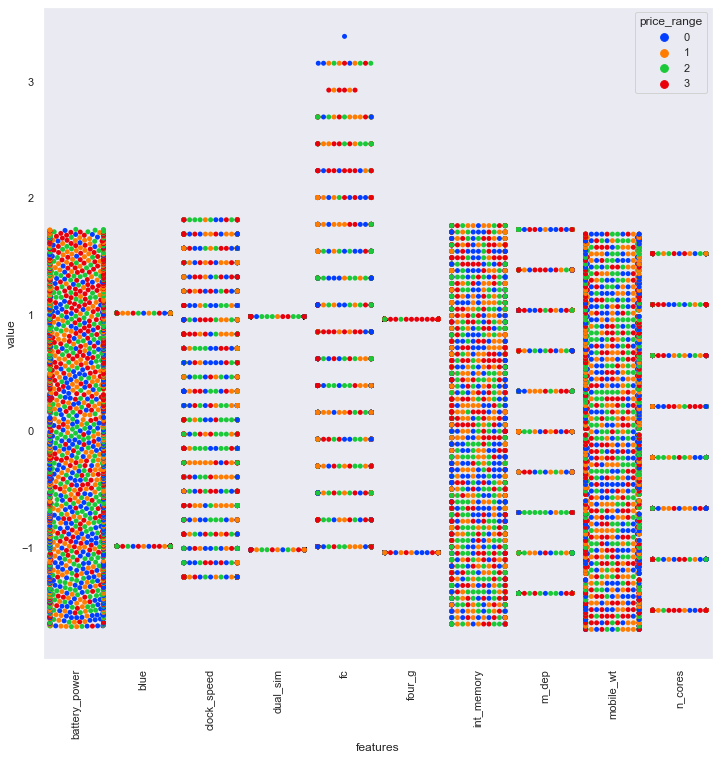

In [13]:
sns.set(style="dark", palette="bright")
data_2 = pd.melt(data_std_1,id_vars="price_range",
                    var_name="features",
                    value_name='value')
data_2
plt.figure(figsize=(12,12))
sns.swarmplot(x="features", y="value", hue="price_range", data=data_2)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'pc'),
  Text(1, 0, 'px_height'),
  Text(2, 0, 'px_width'),
  Text(3, 0, 'ram'),
  Text(4, 0, 'sc_h'),
  Text(5, 0, 'sc_w'),
  Text(6, 0, 'talk_time'),
  Text(7, 0, 'three_g'),
  Text(8, 0, 'touch_screen'),
  Text(9, 0, 'wifi')])

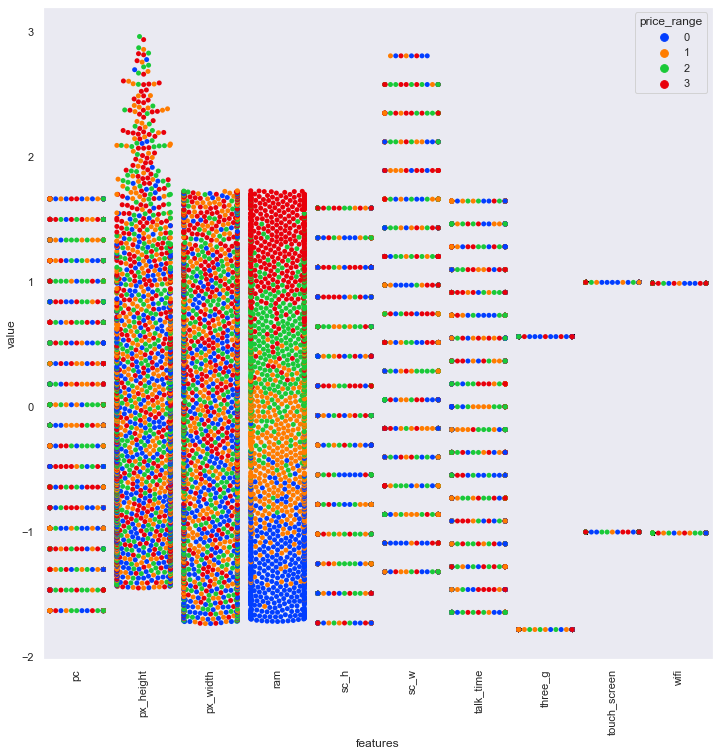

In [13]:
sns.set(style="dark", palette="bright")
data_1 = pd.melt(data_std_2,id_vars="price_range",
                    var_name="features",
                    value_name='value')
data_1
plt.figure(figsize=(12,12))
sns.swarmplot(x="features", y="value", hue="price_range", data=data_1)

plt.xticks(rotation=90)